In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Уравнение
$\frac{\mathrm{d^2}x}{\mathrm{d}t^2} - \mu (1 - (\frac{\mathrm{d}x}{\mathrm{d}t})^2)\frac{\mathrm{d}x}{\mathrm{d}t} + x = 0 $  
Перепишем уравнение в виде системы ОДУ:  
$\frac{\mathrm{d}x}{\mathrm{d}t} = y$  
$\frac{\mathrm{d}y}{\mathrm{d}t} =  \mu (1 - y^2)y -x$  
$x(0) = 0; y(0) = 0.001; \mu = 10$    
$0 < t \leq T_k; T_k = 1000$  


In [2]:
def f(t, w):
    x = w[0]
    y = w[1]
    return np.array([y, mu*(1-y*y)*y - x])
w0 = np.array([0 , 0.001])
t0 = 0
tn = 1000
mu = 10

Для решения будем использовать неявный метод Рунге-Кутты 2 порядка
## Метод Рунге-Кутты
Общая формула: $\overrightarrow{w_{n+1}} = \overrightarrow{w_{n}} + h\sum\limits_{i=1}^nb_{i}\overrightarrow{k_{i}}$,    
где $w$ - вектор неизвестных, $k_{i} = f(x_{n} + c_{i}h, w_{n} + h\sum\limits_{i=1}^{s_{i}}a_{ij}k_{j})$
Коэфициенты $a, b, c$ опредялются таблицей Бутчера:

|$c_{1}$|$a_{11}$|$a_{12}$|$\ldots$|$a_{1s}$|
|----------|----------|----------|----------|----------|
|$c_{2}$|$a_{21}$|$a_{22}$|$\ldots$|$a_{2s}$|
|$\ldots$|$\ldots$|$\ldots$|$\ldots$|$\ldots$|
|$c_{s}$|$a_{s1}$|$a_{s2}$|$\ldots$|$a_{ss}$|
||$b_{1}$|$b_{2}$|$\ldots$|$b_{s}$|    

Явный метод характерен тем, что матрица коэффициентов $a_{ij}$ для него имеет нижний треугольный вид (включая и нулевую главную диагональ) — в отличие от неявного метода, где матрица имеет произвольный вид

|$\frac{1}{4}$|$\frac{1}{4}$|$0$|
|----------|----------|----------|
|$\frac{3}{4}$|$\frac{1}{2}$|$\frac{1}{4}$|
||$\frac{1}{2}$|$\frac{1}{2}$|  

Таким образом, формулы имеют вид:  
$w_{n+1} = w_{n} + h\frac{k_1 + k_2}{2}$  
$k_1 = f(t_n + \frac{h}{4}, w_n + \frac{h}{4}k_1)$  
$k_2 = f(t_n + \frac{3h}{4}, w_n + h(\frac{k_1}{2} + \frac{k_2}{4})$  

In [3]:
c = [1/4, 3/4]
b = [0.5, 0.5]
A = [[1/4, 0], [1/2, 1/2]]

In [4]:
def runge_kutta(f, h, t0, tn, w0):

    n = int((tn - t0) / h)

    t = np.zeros(n+1)
    w = np.zeros((n+1, 2))

    t[0] = t0
    w[0] = w0
    
    
    for i in range(n):
        # method simple iteration 
        k12 = [np.zeros(2), np.zeros(2)]
        
        for j in range(2):
            k12 = [f(t + h * c[k], w[i] + h * sum([x*y for x,y in zip(k12, A[k])])) for k in range(2)]
            
        w[i+1] = w[i] + h * sum([x*y for x,y in zip(k12, b)])
        t[i+1] = t[i] + h

    return t, w

In [5]:
t, w  = runge_kutta(f, 0.005, t0, tn, w0)

x, y = map(np.array, zip(*w))

Посмотрим, что получилось

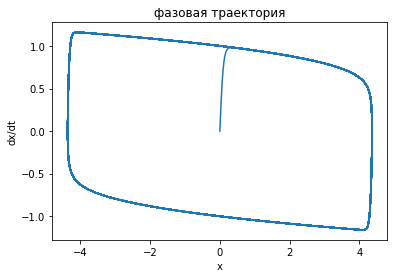

In [6]:
plt.plot(x, y)
plt.title('фазовая траектория')
plt.xlabel('x')
plt.ylabel('dx/dt')
plt.show()

Скорее всего, эта палочка из-за плохих (0_о) начальных условий

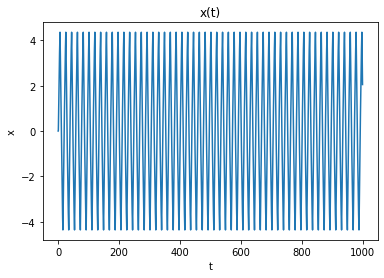

In [7]:
plt.plot(t, x)
plt.title('x(t)')
plt.xlabel('t')
plt.ylabel('x')
plt.show()

## Трехстадийный метод типа Розенброка
Рассматривается задача Коши $\frac{\mathrm{d}u}{\mathrm{d}t} = f(u), u(t_0) = u_0, t_0 \leq t \leq t_n$  
Это всё вектор-функции  
Численная формула: $u_{n+1} = u_n + p_1 k_1 + p_2 k_2 + p_3 k_3$    
где $k_i$:    
$D_n k_1 = h f(u_n)$  
$D_n k_2 = h f(u_n + \beta_{21} k_1)$  
$D_n k_3 = h f(u_n + \beta_{31} k_1 + \beta_{32} k_2)$    
где $D_n = E + a h J(u_n)$    
$J$ - якобиан системы    
$a, \beta_{ij}, p_i$ - некоторые коэффициенты. Они должы удовлетворять определенным условиям, которые мне лень выписывать. Возьмём уже готовые.

In [8]:
p1 = 0.435866521508459
p2 = 0.4782408332745185
p3 = 0.0858926452170225

a = p1

b21 = p1
b31 = p1
b32 = -2.116053335949811

In [9]:
def J(u):
    x = u[0]
    y = u[1]
    
    f1_x = 0
    f1_y = 1
    f2_x = -1
    f2_y = mu*(1 - 3*y*y)

    return np.matrix([[f1_x, f1_y], [f2_x, f2_y]])


def D(u, h):
    return np.eye(2) + a * h * J(u)

In [10]:
def rosenbrok(f, h, t0, tn, u0):

    # Define the number of steps
    n = int((tn - t0) / h)

    # Initialize arrays for t and u
    t = np.zeros(n+1)
    u = np.zeros((n+1, 2))

    t[0] = t0
    u[0] = u0

    for i in range(n):
        k1 = np.linalg.solve(D(u[i], h), h * f(t[i], u[i]))
        k2 = np.linalg.solve(D(u[i], h), h * f(t[i], u[i] + b21 * k1))
        k3 = np.linalg.solve(D(u[i], h), h * f(t[i], u[i] + b31 * k1 + b32 * k2))
        u[i+1] = u[i] + p1*k1 + p2*k2 + p3*k3
        t[i+1] = t[i] + h

    return t, u

In [11]:
t, u = rosenbrok(f, 0.005, t0, tn, w0)
x, y = map(np.array, zip(*u))

Посмотрим, что получилось

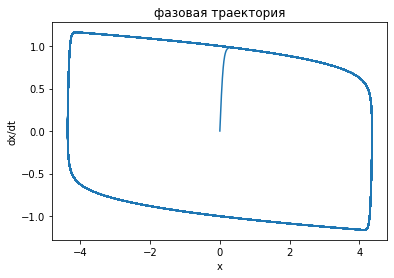

In [12]:
plt.plot(x, y)
plt.title('фазовая траектория')
plt.xlabel('x')
plt.ylabel('dx/dt')
plt.show()

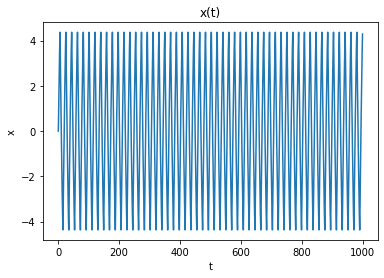

In [13]:
plt.plot(t, x)
plt.title('x(t)')
plt.xlabel('t')
plt.ylabel('x')
plt.show()